In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy

# Preprocessing
- Clean data (resmove nan scores and out of range decile score)
- drop unused columns 
- label encoding 

### EDA 
- Correlation Matrix 
- age group breakdown visualization
- race breakdown visualization

In [53]:
compas = pd.read_csv('data/compas-scores-two-years-violent.csv')
compas.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,two_year_recid.1
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1,1
2,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0,0
3,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,Low,2013-03-26,NaN,NaN,2,0,1102,0,0,0
4,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,...,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0,0


In [54]:
compas['c_jail_in'] = pd.to_datetime(compas['c_jail_in'], format='mixed')
compas['c_jail_out'] = pd.to_datetime(compas['c_jail_out'], format='mixed')

compas['v_screening_date'] = pd.to_datetime(compas['v_screening_date'], format='mixed')
compas['vr_offense_date'] = pd.to_datetime(compas['vr_offense_date'], format='mixed')

compas['c_offense_date'] = pd.to_datetime(compas['c_offense_date'], format='mixed')
compas['c_arrest_date'] = pd.to_datetime(compas['c_arrest_date'], format='mixed')

compas['compas_screening_date'] = pd.to_datetime(compas['compas_screening_date'], format='mixed')

In [55]:
compas = compas.drop(['first','last','c_case_number','c_charge_degree', 'c_charge_desc', 'r_case_number','r_charge_degree','vr_case_number','vr_charge_degree','start','end','event'],axis=1)

#remove row with nan scores 
compas = compas.loc[compas['score_text'].notnull()]
#clean out the "-1" decile score from dataset 
compas = compas.loc[compas['v_decile_score'] != -1]

#label encodimg
compas['sex'] = compas['sex'].replace({'Male': 1, 'Female': 0})
compas['score_text'] = compas['score_text'].replace({'Low':0, 'Medium':1, 'High': 2})

#days in jail
compas['jail_out- jail_in'] = (compas['c_jail_out'] - compas['c_jail_in']).dt.days

In [5]:
compas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4738 entries, 0 to 4742
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       4738 non-null   int64         
 1   name                     4738 non-null   object        
 2   compas_screening_date    4738 non-null   datetime64[ns]
 3   sex                      4738 non-null   int64         
 4   dob                      4738 non-null   object        
 5   age                      4738 non-null   int64         
 6   age_cat                  4738 non-null   object        
 7   race                     4738 non-null   object        
 8   juv_fel_count            4738 non-null   int64         
 9   decile_score             4738 non-null   int64         
 10  juv_misd_count           4738 non-null   int64         
 11  juv_other_count          4738 non-null   int64         
 12  priors_count             4738 non-null 

In [6]:
compas.describe(include=["object","category"]).T

,count,unique,top,freq
name,4738,4716,anthony gonzalez,2
dob,4738,3973,1985-11-02,4
age_cat,4738,3,25 - 45,2698
race,4738,6,African-American,2266
r_offense_date,995,675,2016-03-01,5
r_charge_desc,972,196,Battery,192
r_jail_in,690,522,2014-02-18,5
r_jail_out,690,494,2013-11-13,5
vr_charge_desc,819,83,Battery,329
type_of_assessment,4738,1,Risk of Recidivism,4738


In [7]:
compas.describe().T

,count,mean,min,25%,50%,75%,max,std
id,4738.0,5453.467919,1.0,2626.25,5474.5,8239.75,11000.0,3190.61173
compas_screening_date,4738,2013-08-15 23:33:15.272266752,2013-01-01 00:00:00,2013-03-27 06:00:00,2013-08-20 00:00:00,2013-12-15 18:00:00,2014-12-31 00:00:00,NaN
sex,4738.0,0.789996,0.0,1.0,1.0,1.0,1.0,0.407354
age,4738.0,35.982693,18.0,26.0,33.0,44.0,83.0,12.187877
juv_fel_count,4738.0,0.045378,0.0,0.0,0.0,0.0,20.0,0.420913
decile_score,4738.0,3.983326,1.0,1.0,3.0,6.0,10.0,2.746394
juv_misd_count,4738.0,0.070916,0.0,0.0,0.0,0.0,8.0,0.406349
juv_other_count,4738.0,0.080836,0.0,0.0,0.0,0.0,17.0,0.469019
priors_count,4738.0,2.678767,0.0,0.0,1.0,3.0,38.0,4.085974
days_b_screening_arrest,4470.0,2.734452,-345.0,-1.0,-1.0,-1.0,1057.0,78.116981


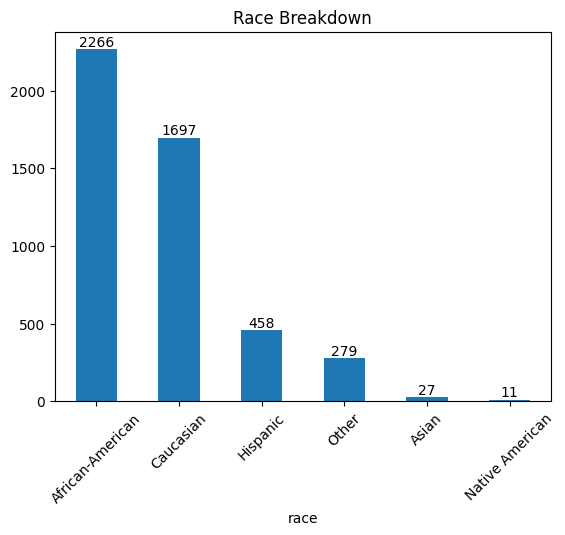

In [8]:
compas['race'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title("Race Breakdown")
for i, value in enumerate(compas['race'].value_counts()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

In [37]:
aa = compas['race'].value_counts().max() / compas['race'].value_counts().sum()
c = len(compas[compas['race'] == 'Caucasian']) / compas['race'].value_counts().sum()
print(f'Percentage of African American: {aa*100}%')
print(f'Percentage of Caucasian: {c*100}%')
print(f'Percetnage of Other (Hispanic, Asian, Native American and others): {(1 - aa - c)*100}%')

Percentage of African American: 47.82608695652174%
Percentage of Caucasian: 35.816800337695234%
Percetnage of Other (Hispanic, Asian, Native American and others): 16.357112705783027%


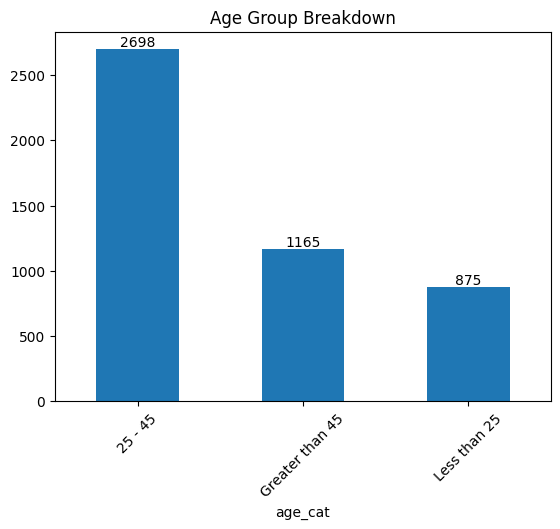

In [9]:
# Your existing code
compas['age_cat'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title("Age Group Breakdown")

for i, value in enumerate(compas['age_cat'].value_counts()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

In [36]:
age_pct = compas['age_cat'].value_counts().max() / compas['age_cat'].value_counts().sum()
print(f'Percentage of Majority Age Group: {age_pct*100}%')

Percentage of Majority Age Group: 56.94385816800338


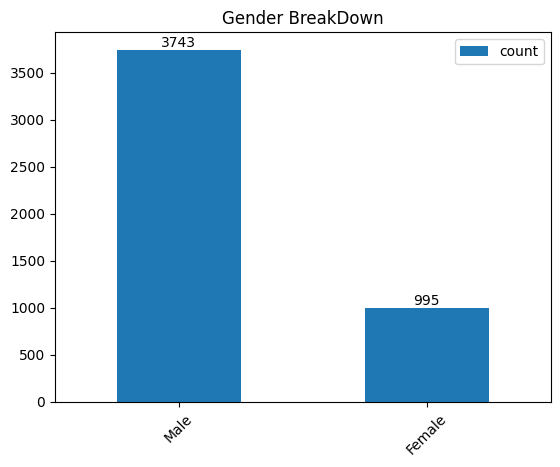

In [10]:

gender = pd.DataFrame(compas['sex'].value_counts())
gender.index = np.array(['Male', 'Female'])
gender.plot(kind='bar')
plt.xticks(rotation=45)
plt.title("Gender BreakDown")

for i, value in enumerate(compas['sex'].value_counts()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
plt.show()


In [38]:
sex_pct = compas['sex'].value_counts().max() / compas['sex'].value_counts().sum()
print(f'Percentage of Majority Age Group: {sex_pct*100}%')

Percentage of Majority Age Group: 78.99957788096243%


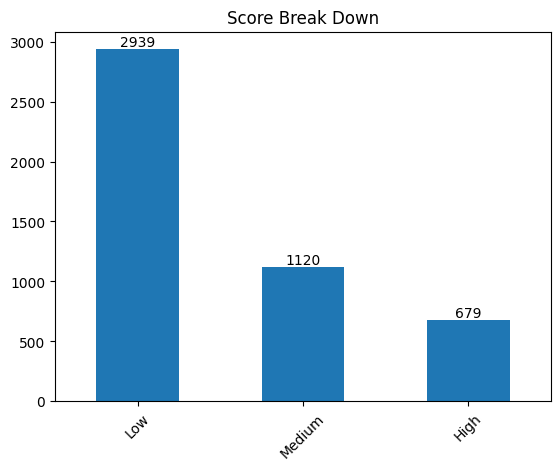

In [11]:
score = compas['score_text'].value_counts()
score.index = np.array(['Low','Medium','High'])
score.plot(kind='bar')
plt.xticks(rotation=45)
plt.title("Score Break Down")
for i, value in enumerate(compas['score_text'].value_counts()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

In [12]:
compas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4738 entries, 0 to 4742
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       4738 non-null   int64         
 1   name                     4738 non-null   object        
 2   compas_screening_date    4738 non-null   datetime64[ns]
 3   sex                      4738 non-null   int64         
 4   dob                      4738 non-null   object        
 5   age                      4738 non-null   int64         
 6   age_cat                  4738 non-null   object        
 7   race                     4738 non-null   object        
 8   juv_fel_count            4738 non-null   int64         
 9   decile_score             4738 non-null   int64         
 10  juv_misd_count           4738 non-null   int64         
 11  juv_other_count          4738 non-null   int64         
 12  priors_count             4738 non-null 

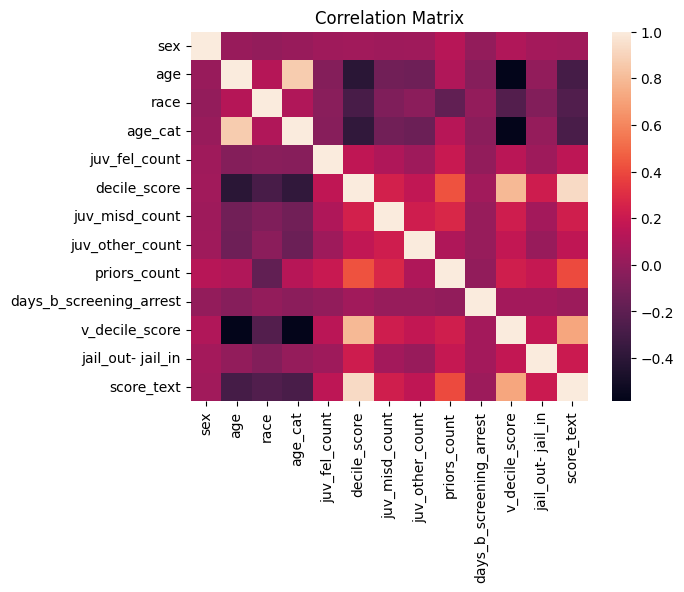

In [44]:
from sklearn.preprocessing import LabelEncoder

compas['reoffend'] = compas['v_decile_score'].apply(lambda x: 1 if x > 5 else 0)
compas.loc[:, 'race'] = LabelEncoder().fit_transform(compas['race'])
compas.loc[:,'age_cat'] = compas['age_cat'].replace({'Greater than 45': 2, '25 - 45': 1, 'Less than 25': 0})

corr_matrix = compas[['sex', 'age','race','age_cat','juv_fel_count', 'decile_score', 
                    'juv_misd_count','juv_other_count','priors_count', 
                    'days_b_screening_arrest', 'v_decile_score', 'jail_out- jail_in','score_text' ]].corr()
sns.heatmap(corr_matrix, annot=False)
plt.title("Correlation Matrix")
plt.show()

In [46]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,sex,age,race,age_cat,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,v_decile_score,jail_out- jail_in,score_text
sex,1.000000,0.015978,0.000777,0.021337,0.040816,0.047062,0.038976,0.044674,0.128021,-0.000275,0.103403,0.062777,0.049109
age,0.015978,1.000000,0.121625,0.869409,-0.053960,-0.409487,-0.124261,-0.133774,0.103309,-0.050985,-0.585066,-0.003244,-0.298658
race,0.000777,0.121625,1.000000,0.107228,-0.035720,-0.282382,-0.074115,-0.033316,-0.186598,0.000997,-0.241518,-0.061934,-0.247542
age_cat,0.021337,0.869409,0.107228,1.000000,-0.040806,-0.378832,-0.126078,-0.147724,0.131592,-0.028793,-0.578813,0.003519,-0.278713
juv_fel_count,0.040816,-0.053960,-0.035720,-0.040806,1.000000,0.158253,0.099670,0.035951,0.195420,-0.005982,0.141345,0.038547,0.155856
decile_score,0.047062,-0.409487,-0.282382,-0.378832,0.158253,1.000000,0.238647,0.169850,0.428627,0.048097,0.793656,0.214701,0.927137
juv_misd_count,0.038976,-0.124261,-0.074115,-0.126078,0.099670,0.238647,1.000000,0.221354,0.275389,0.013966,0.224865,0.055069,0.231478
juv_other_count,0.044674,-0.133774,-0.033316,-0.147724,0.035951,0.169850,0.221354,1.000000,0.097052,0.011059,0.174892,0.020226,0.163926
priors_count,0.128021,0.103309,-0.186598,0.131592,0.195420,0.428627,0.275389,0.097052,1.000000,-0.007479,0.228437,0.184356,0.400409
days_b_screening_arrest,-0.000275,-0.050985,0.000997,-0.028793,-0.005982,0.048097,0.013966,0.011059,-0.007479,1.000000,0.056312,0.053822,0.030595


In [15]:
compas.head()

,id,name,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,two_year_recid,two_year_recid.1,jail_out- jail_in
0,1,miguel hernandez,2013-08-14,1,1947-04-18,69,Greater than 45,Other,0,1,...,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,0,0.0
1,3,kevon dixon,2013-01-27,1,1982-01-22,34,25 - 45,African-American,0,3,...,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,1,1,10.0
2,5,marcu brown,2013-01-13,1,1993-01-21,23,Less than 25,African-American,0,8,...,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,0,NaN
3,6,bouthy pierrelouis,2013-03-26,1,1973-01-22,43,25 - 45,Other,0,1,...,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,0,NaN
4,7,marsha miles,2013-11-30,1,1971-08-22,44,25 - 45,Other,0,1,...,Risk of Violence,1,Low,2013-11-30,2013-11-30,2013-12-01,0,0,0,1.0


In [16]:
pearson_c = compas[['jail_out- jail_in','v_decile_score']].dropna(how='any')

print('Pearson Correlation Between Length of Stay (jail_out - jail_in) and COMPAS Decile Score')
scipy.stats.pearsonr(pearson_c['jail_out- jail_in'], pearson_c['v_decile_score'])

Pearson Correlation Between Length of Stay (jail_out - jail_in) and COMPAS Decile Score


PearsonRResult(statistic=0.17141726367398294, pvalue=8.012513440675958e-31)

In [56]:
count_c = compas[['sex', 'race', 'juv_fel_count','juv_other_count','juv_misd_count','priors_count',]]
count_c['sex'] = count_c['sex'].replace({1:'Male', 0:'Female'})
print('interaction table of counts between race/sex interactions')
count_c.groupby(['sex','race']).aggregate(['mean','std','median']).round(3).style.background_gradient(axis=0)

interaction table of counts between race/sex interactions


/tmp/ipykernel_785/326945847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_c['sex'] = count_c['sex'].replace({1:'Male', 0:'Female'})


In [57]:
count_c = compas[['sex', 'race', 'is_recid','decile_score.1','v_decile_score',]]
count_c['sex'] = count_c['sex'].replace({1:'Male', 0:'Female'})
print('interaction table of counts between race/sex interactions')
count_c.groupby(['sex','race']).aggregate(['mean','std','median']).round(3).style.background_gradient(axis=0)

interaction table of counts between race/sex interactions


/tmp/ipykernel_785/2052070467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_c['sex'] = count_c['sex'].replace({1:'Male', 0:'Female'})


In [65]:
dec_pivot_1 = compas[['v_decile_score','race']].groupby('race').apply(lambda x: x.groupby(['v_decile_score']).count()).unstack()
dec_pivot_1

race                                                   \
v_decile_score       1      2      3      4      5      6      7      8    
race                                                                       
African-American  447.0  344.0  314.0  273.0  221.0  232.0  171.0  107.0   
Asian              15.0    2.0    1.0    5.0    1.0    2.0    NaN    1.0   
Caucasian         746.0  261.0  230.0  151.0  111.0   85.0   49.0   25.0   
Hispanic          190.0   79.0   64.0   32.0   36.0   26.0   16.0    9.0   
Native American     3.0    2.0    NaN    2.0    1.0    1.0    NaN    NaN   
Other             125.0   49.0   30.0   20.0   14.0   15.0   11.0    9.0   

                               
v_decile_score       9     10  
race                           
African-American  108.0  49.0  
Asian               NaN   NaN  
Caucasian          30.0   9.0  
Hispanic            5.0   1.0  
Native American     2.0   NaN  
Other               3.0   3.0

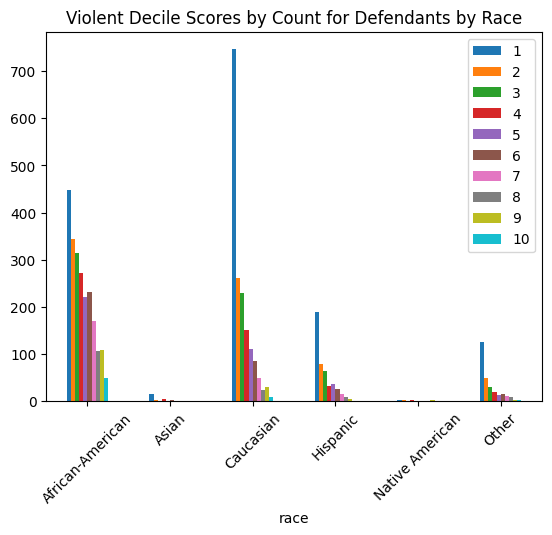

In [78]:
dec_pivot_1.plot(kind='bar')
plt.xticks(rotation=45)
plt.legend([1,2,3,4,5,6,7,8,9,10])
plt.title("Violent Decile Scores by Count for Defendants by Race")
plt.show()


In [79]:
dec_pivot = compas[['decile_score.1','race']].groupby('race').apply(lambda x: x.groupby(['decile_score.1']).count()).unstack()
dec_pivot

race                                                   \
decile_score.1       1      2      3      4      5      6      7      8    
race                                                                       
African-American  331.0  296.0  232.0  241.0  229.0  218.0  228.0  175.0   
Asian              14.0    4.0    4.0    NaN    NaN    3.0    NaN    1.0   
Caucasian         573.0  270.0  200.0  199.0  152.0  103.0   73.0   52.0   
Hispanic          158.0   84.0   63.0   40.0   34.0   19.0   22.0   18.0   
Native American     NaN    4.0    1.0    NaN    NaN    1.0    2.0    1.0   
Other             128.0   47.0   24.0   26.0   14.0   15.0    7.0    5.0   

                                
decile_score.1       9      10  
race                            
African-American  181.0  135.0  
Asian               NaN    1.0  
Caucasian          46.0   29.0  
Hispanic           10.0   10.0  
Native American     2.0    NaN  
Other               7.0    6.0

Text(0.5, 1.0, 'Violent Decile Scores by Count for Defendants by Race')

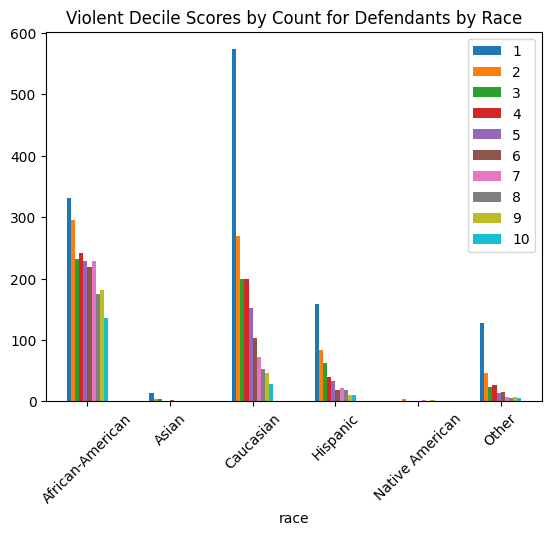

In [80]:
dec_pivot.plot(kind='bar',)
plt.xticks(rotation=45)
plt.xlim=(0, 700)
plt.legend([1,2,3,4,5,6,7,8,9,10])
plt.title("Violent Decile Scores by Count for Defendants by Race")